<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Cours XAI</center>
    <center> LAB1 : Modèles transparents</center>
    <center> Corrections</center>
<hr style=" border:none; height:3px;">
</h1>

# Prérequis
En utilisant pip, conda ou autre, il faudra installer les modules python suivants:
* numpy
* pandas
* scipy
* scikit-learn
* matplotlib
* pygam

# Prise en main du ficher de données
Les données que nous allons utiliser sont des données qui indiquent le coût de l'assurance maladie pour plus de 1300 personnes.
Une personne est décrite par:
- son âge
- son sexe
- sa masse corporelle
- son nombre d'enfants
- si elle fume ou pas
- la région dans laquelle elle vit
- le coût de son assurance.

Nous allons dans un premier temps prendre en main le fichier de données.

In [1]:
from pandas import *
data = read_csv(r'insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


On remarque:
- qu'il y a 7 colonnes, 1338 lignes
- qu'il n'y a pas de valeurs manquantes
- qu'il y a 3 colonnes catégorielles (object).

Q1.Affichez les modalités (les valeurs possibles pour chacune de ces colonnes) ainsi que l'effectif correspondant.

In [3]:
data.groupby(["sex"]).size()

sex
female    662
male      676
dtype: int64

In [4]:
data.groupby(["children"]).size()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

In [5]:
data.groupby(["region"]).size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [6]:
data.groupby(["smoker"]).size()

smoker
no     1064
yes     274
dtype: int64

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

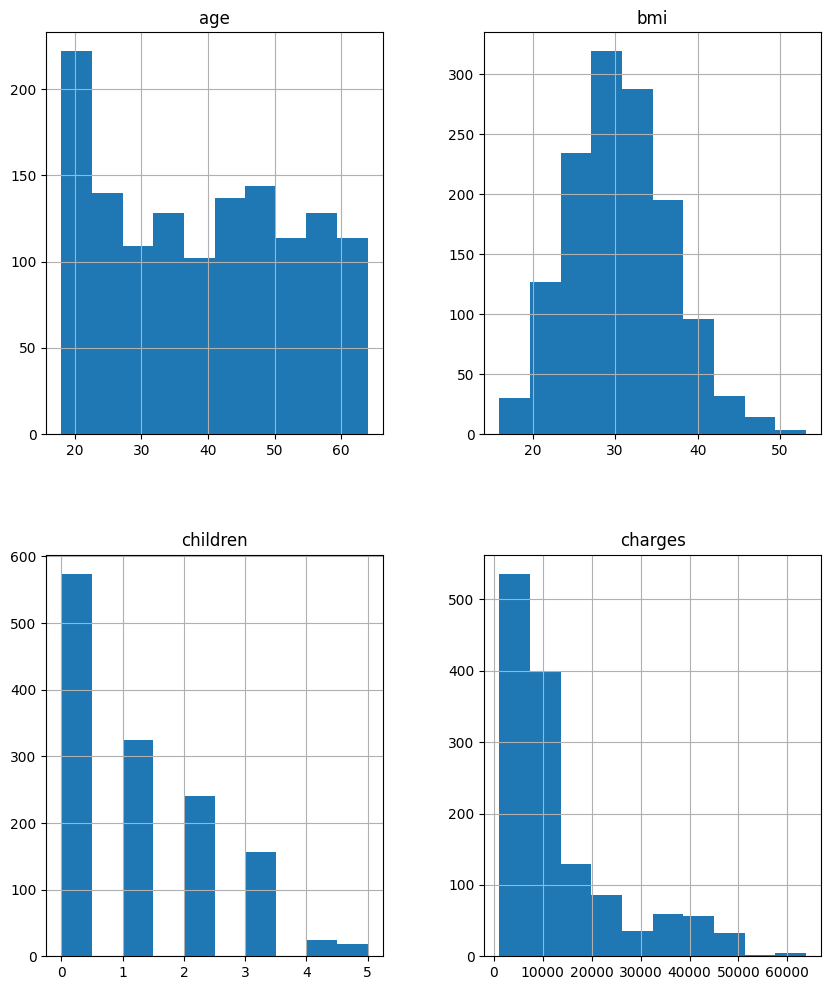

In [7]:
# histogramme pour features numériques
data.hist(bins=10, figsize=(10,12))

Que pouvez-vous dire sur l'équilibre du jeu de données ? Apprendre sur ce dernier va-t-il poser un problème de représentativité ?

In [8]:
#entrez ici votre réponse entre

# Régression linéaire
Nous allons appliquer dans un premier temps la régression linéaire. Cependant, elle ne prend pas correctement en compte les données catégorielles.
Nous allons devoir les transformer.

## Adaptation du jeu de données
La régression linéaire ne gère pas très bien les données catégorielles, en particulier quand elles ne sont pas ordonnées.
Classiquement, on transforme:
    - les données binaires ou à 2 modalités en 0 et 1
    - les données à au moins 3 modalités en un codage binaire de ces modalités: on se retrouve avec autant de colonnes binaires qu'il y a de modalités.
Pour les colonnes a deux modalités, on peut directement les transformer avec une méthode de conversion.

In [9]:
def YesNoConverter(val):
    if val=="yes": return 1
    else: return 0

data["smoker"] = data["smoker"].apply(YesNoConverter)

In [10]:
def MaleFemaleConverter(val):
    #faire la même chose ici
    if val=="male": return 0
    else: return 1

data["sex"] = data["sex"].apply(MaleFemaleConverter)

Pour la dernière colonne, nous allons utiliser la fonction  [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) qui fait tout le travail à notre place. Il faudra ensuite insérer les colonnes créées avec [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) et supprimer la colonne originale avec [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [11]:
newcols = get_dummies(data["region"])
data = concat([newcols,data], axis=1)
data = data.drop(["region"], axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   northeast  1338 non-null   uint8  
 1   northwest  1338 non-null   uint8  
 2   southeast  1338 non-null   uint8  
 3   southwest  1338 non-null   uint8  
 4   age        1338 non-null   int64  
 5   sex        1338 non-null   int64  
 6   bmi        1338 non-null   float64
 7   children   1338 non-null   int64  
 8   smoker     1338 non-null   int64  
 9   charges    1338 non-null   float64
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,0,0,0,1,19,1,27.900,0,1,16884.92400
1,0,0,1,0,18,0,33.770,1,0,1725.55230
2,0,0,1,0,28,0,33.000,3,0,4449.46200
3,0,1,0,0,33,0,22.705,0,0,21984.47061
4,0,1,0,0,32,0,28.880,0,0,3866.85520


In [12]:
#Ou directement !!! 
data=get_dummies(data, prefix=['region'])
print(data.columns)
data.head()

ValueError: Length of 'prefix' (1) did not match the length of the columns being encoded (0).

In [ ]:
data.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## Régression linéaire
Maintenant que le jeu de données est prêt, utilisez [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de scikit learn pour obtenir un modèle linéaire.

In [ ]:
#Installing 

!pip install -U scikit-learn

     ---------------------------------------- 8.4/8.4 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
# data.iloc[:,:-1] select the colomns until the last column excluded
x,y = data.iloc[:,:-1], data.iloc[:,-1] # last column of data frame
model1 = model1.fit(x,y)

## Interprétation
Maintenant que vous avez un modèle entraînez, mettez en oeuvre ce que nous avons vu en cours (et plus!) pour l'interpréter. Utilisez au moins les poids, la SE et le t pour chaque coefficient.

In [ ]:
import numpy as np

sse = np.sum((model1.predict(x) - y) ** 2, axis=0)
print(sse)

degree =  float(x.shape[0] - x.shape[1])  #degree of freedom
smpvar = sse / degree #sample variance

se = np.array(np.sqrt(np.diagonal(smpvar * np.linalg.inv(np.dot(x.T, x)))))

#t-stastique
t = model1.coef_/se

L = []

#regressor.intercept_ contient l'ordonnée à l'origine.
L.append(["intercept", model1.intercept_, None, None])

labels = list(x.columns) 

for i in range(len(labels)):
    L.append([labels[i], model1.coef_[i], se[i], t[i]])

result = DataFrame.from_records(L, columns=["Column", "Weight", "SE", "t"])
print(result)

48839532843.92186
      Column        Weight           SE          t
0  intercept -12656.862171          NaN        NaN
1  northeast    587.009235   999.649215   0.587215
2  northwest    234.045336  1000.681218   0.233886
3  southeast   -448.012814  1090.509698  -0.410829
4  southwest   -373.041756  1032.967353  -0.361136
5        age    256.856353    11.898849  21.586655
6        sex    131.314359   332.945439   0.394402
7        bmi    339.193454    28.599470  11.860131
8   children    475.500545   137.804093   3.450555
9     smoker  23848.534542   413.153355  57.723202


In [ ]:
#Tapez ici votre interpretation (que révèle le modèle?)
#Concluez sur l'utilisation de ce modèle pour ce dataset

# Arbre de régression
Nous allons à présent tester un deuxième modèle: les arbres de régression. Normalement, la plupart des algorithmes acceptent tous les types de données. Cependant, l'implémentation de scikit learn ne le permet pas. Nous allons donc conserver notre jeu de données tel que pré-traité auparavant.

J'attire sur votre attention que le problème ne vient pas des colonnes binaires (à deux modalités). En revanche, pour les colonnes catégorielles à plus de 2 modalités, l'implémentation de scikit learn traiterait plutôt des valeurs ordinales, et ce n'est pas le cas des régions chez nous. Vous trouverez sur le net des tas d'astuces qui vous diront de remplacer les modalités par des nombres, etc. Elles ne me paraissent pas judicieuses dans notre cas. Aussi, lors de l'interprétation du modèle, je vous demande de prendre avec précautions les 4 colonnes "région".

## Entraînement
Entraînez un arbre de régression avec [scikit learn](https://scikit-learn.org/stable/modules/tree.html). Ne laissez pas les valeurs par défaut dans le constructeur, car sinon votre arbre sera très profond (et donc pas interprétable). Ajustez les paramètres tout en maintenant un taux de classification élevé. 
Remarque: pour cet exercice, il n'est pas nécessaire de mettre en place une cross-validation (on fait de la régression). On peut utilisé le taux de classification sur l'ensemble d'apprentissage ou un sous-ensemble, cela suffit pour cet exercice en tout cas.

In [ ]:
%matplotlib notebook

from sklearn import tree
from matplotlib import pyplot as plt

model2 = tree.DecisionTreeRegressor(max_depth=3)
model2 = model2.fit(x,y)

_ = tree.plot_tree(model2)






In [ ]:
#ou bien
%matplotlib notebook

from sklearn import tree
from matplotlib import pyplot as plt

clf = tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf=10, max_features=3, random_state=2905)
clf = clf.fit(x, y)

<IPython.core.display.Javascript object>


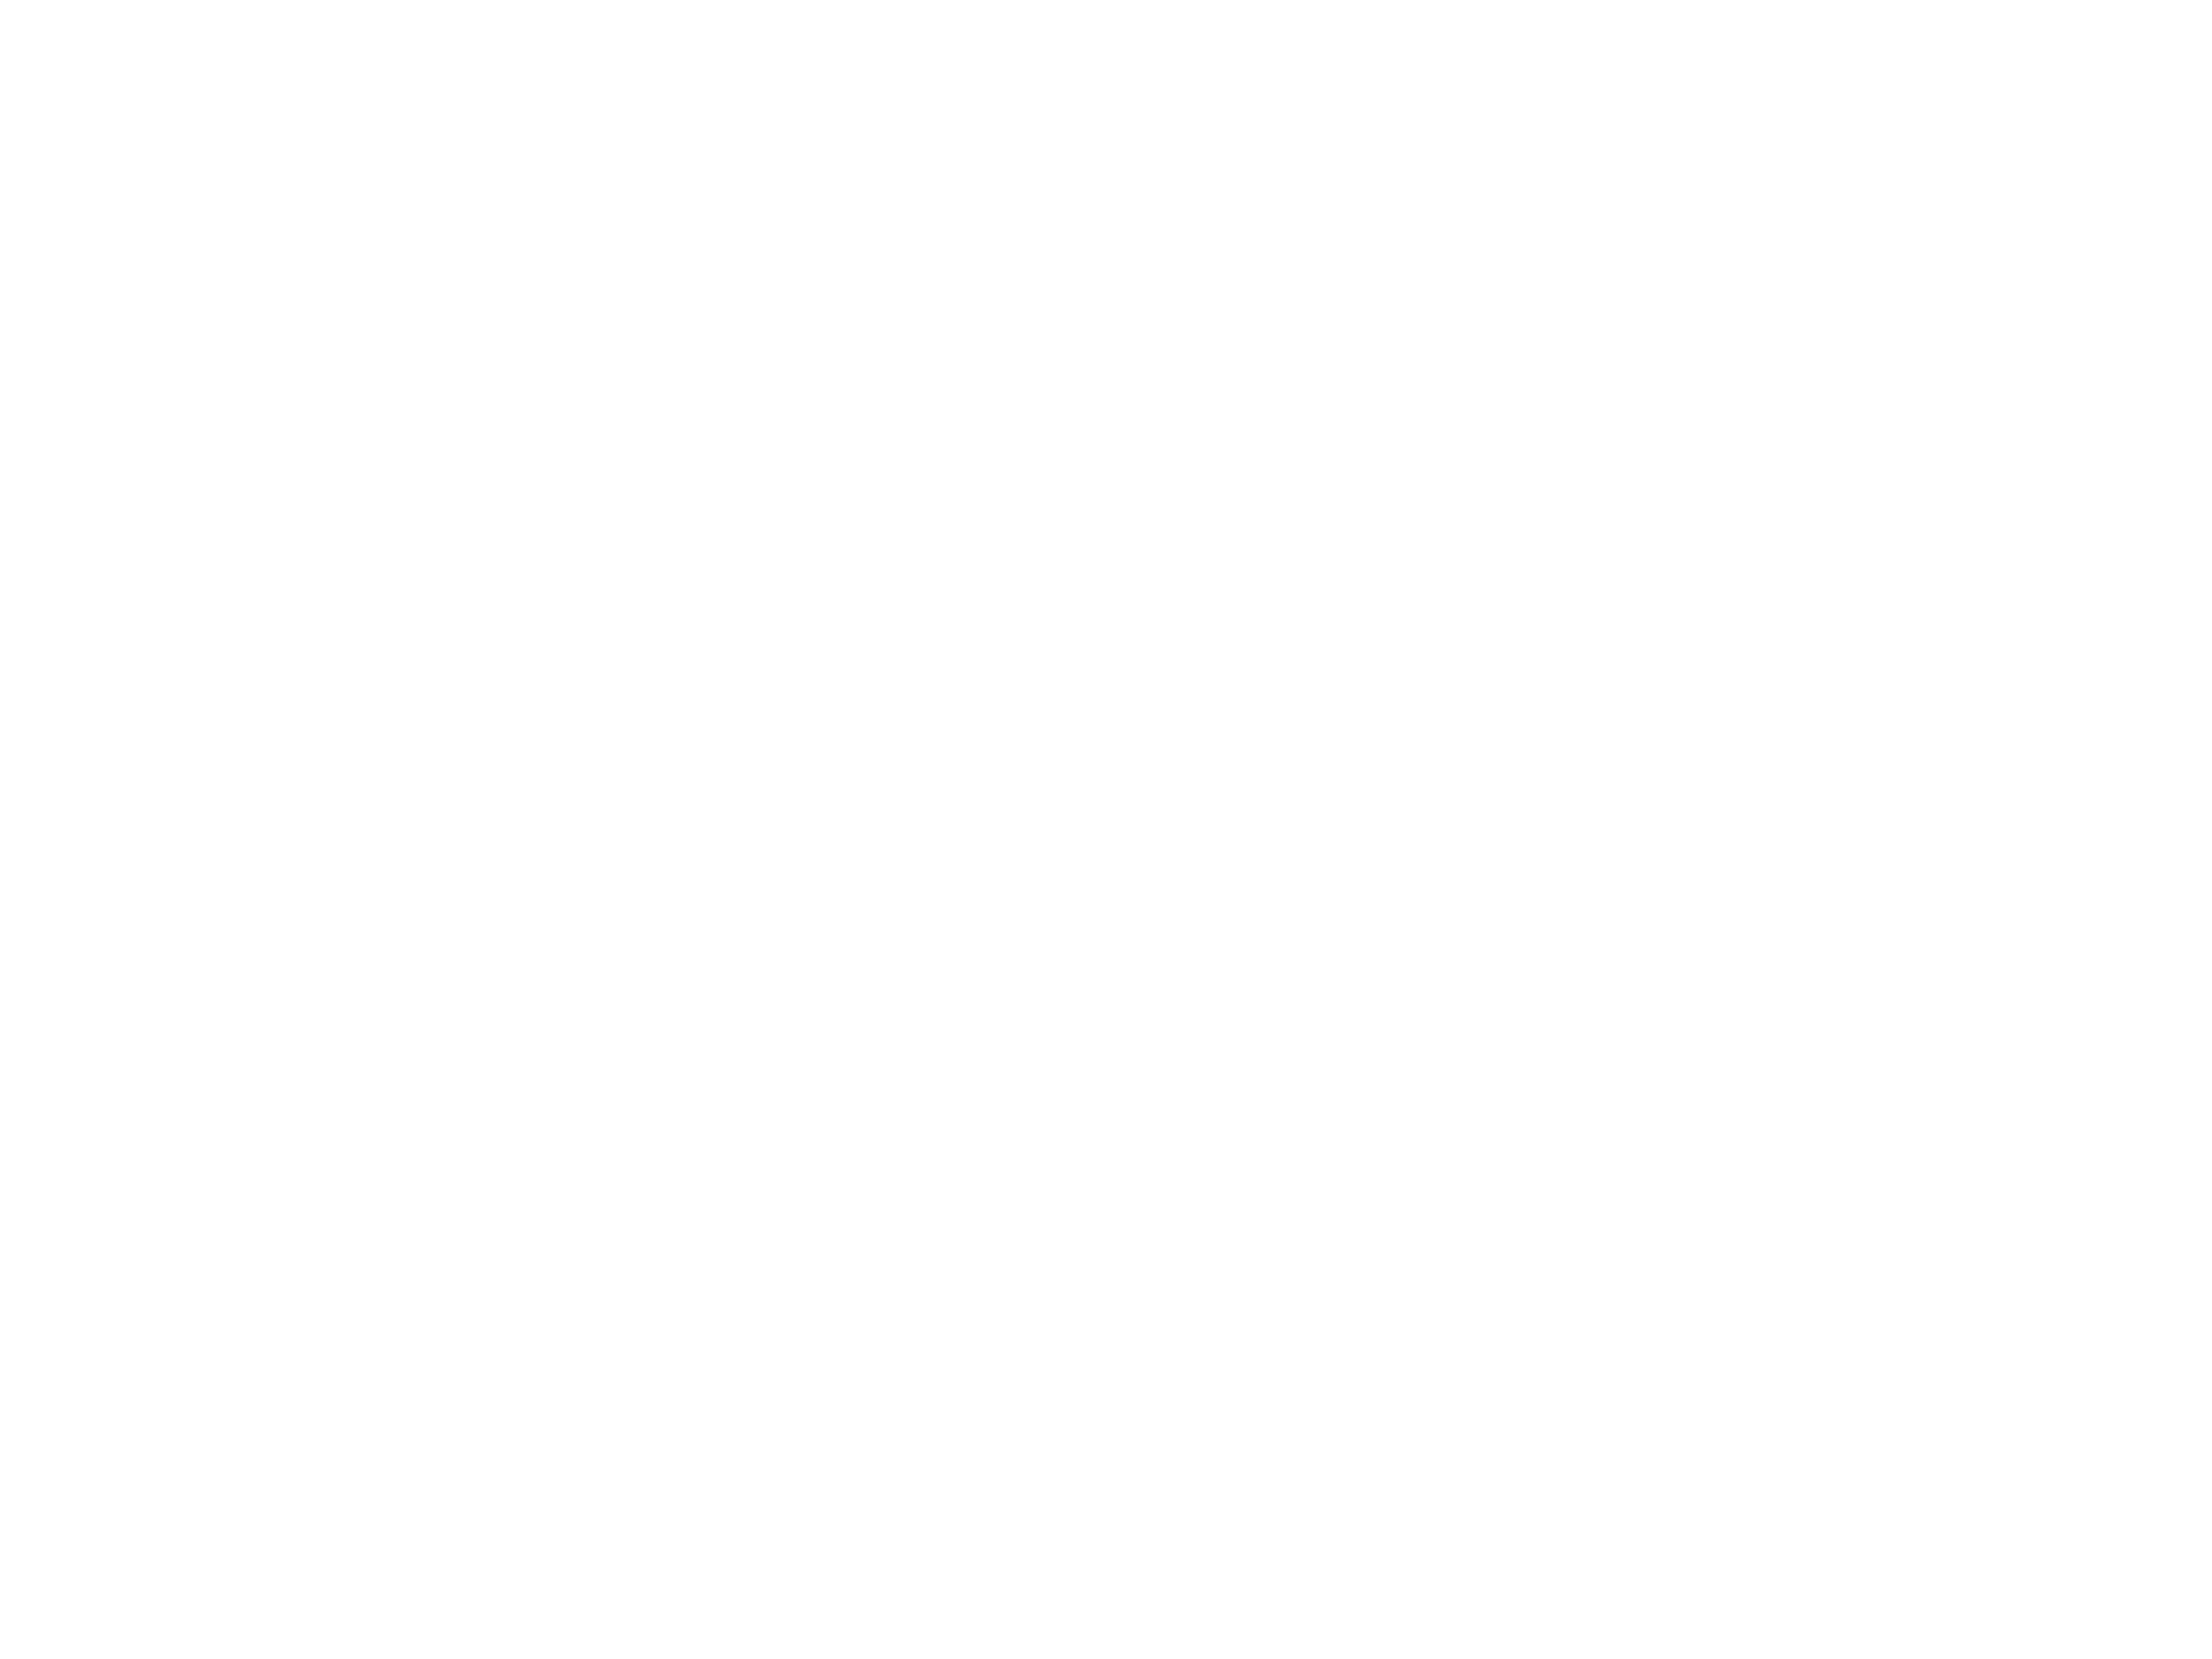

<IPython.core.display.Javascript object>


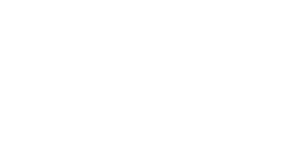

In [ ]:
plt.figure(figsize=(16, 12))
tree.plot_tree(clf, fontsize=10) 
plt.savefig("tree.png")
plt.show()

Prenez la dernière ligne du jeu de données, et retrouvez le chemin de la décision dans l'arbre avec la méthode [decision_path](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.decision_path). L'idée est de connaître la liste des tests par lesquels l'instance est passée.

The decision_path method outputs an indicator matrix that allows us to retrieve the nodes the samples of interest traverse through. A non zero element in the indicator matrix at position (i, j) indicates that the sample i goes through the node j. Or, for one sample i, the positions of the non zero elements in row i of the indicator matrix designate the ids of the nodes that sample goes through.

In [ ]:
n_nodes = clf.tree_.node_count #the total number of nodes,
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

### Chemin de décision ###

# pour le dernier exemple du jeu de données
X_test = np.array(x.loc[1337]).reshape(1, -1)
print("Example : ", X_test)

node_indicator = clf.decision_path(X_test)
print(node_indicator)
leaf_id = clf.apply(X_test) #The leaf ids reached by samples of interest can be obtained with the apply method
print(leaf_id)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]
print("node_index", node_index)

print('\nRules used to predict sample {id}:\n'.format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X_test[{sample}, {feature}] = {value}) "
          "{inequality} {threshold})".format(
              node=node_id,
              sample=sample_id,
              feature=feature[node_id],
              value=X_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id]))

Example :  [[ 0.    1.    0.    0.   61.    1.   29.07  0.    1.  ]]
  (0, 0)	1
  (0, 30)	1
  (0, 44)	1
  (0, 52)	1
  (0, 53)	1
[53]
nodeindex [ 0 30 44 52 53]

Rules used to predict sample 0:

decision node 0 : (X_test[0, 8] = 1.0) > 0.5)
decision node 30 : (X_test[0, 4] = 61.0) > 43.5)
decision node 44 : (X_test[0, 5] = 1.0) > 0.5)
decision node 52 : (X_test[0, 6] = 29.07) <= 30.207500457763672)


/Users/wassila/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Users/wassila/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


## Interprétation
A présent, interprétez le modèle (intéressez-vous à la feature importance). Que révèle l'arbre?

In [ ]:
# feature importances

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x.columns[i],v))

Feature: northeast, Score: 0.00000
Feature: northwest, Score: 0.00000
Feature: southeast, Score: 0.00056
Feature: southwest, Score: 0.00000
Feature: age, Score: 0.11129
Feature: sex, Score: 0.00099
Feature: bmi, Score: 0.16045
Feature: children, Score: 0.00586
Feature: smoker, Score: 0.72086


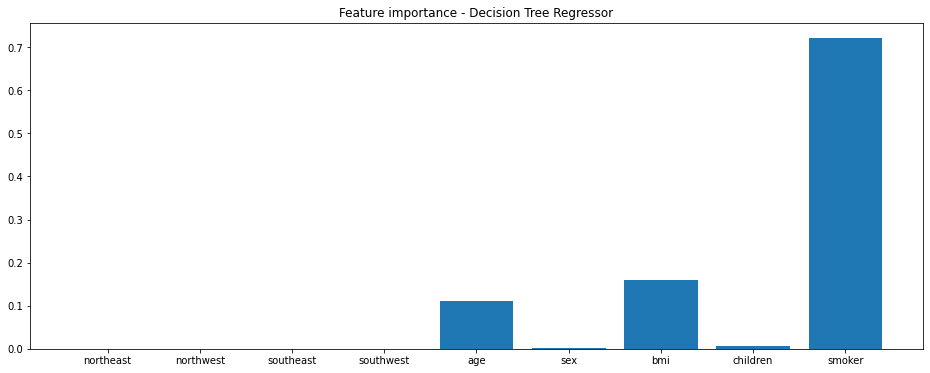

In [ ]:
%matplotlib inline
# plot feature importance
plt.figure(figsize=(16, 6))
plt.bar(x.columns, importance, tick_label=x.columns)
plt.title("Feature importance - Decision Tree Regressor")
plt.show()

# GAM
Nous allons passer au troisième type de modèle: les GAM.

## Entraînement
En utilisant le module pyGam, entraînez un GAM pour notre tâche de régression. Ne laissez pas les paramètres par défaut.

In [ ]:
from pygam import LinearGAM, s
model3 = LinearGAM(s(4) + s(6) + s(8)).fit(x, y)
model3.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.3285
Link Function:                     IdentityLink Log Likelihood:                                 -24512.595
Number of Samples:                         1338 AIC:                                            49083.8471
                                                AICc:                                           49085.2076
                                                GCV:                                         37511785.7486
                                                Scale:                                       36084955.7177
                                                Pseudo R-Squared:                                    0.759
Feature Function                  Lam

/Users/wassila/opt/miniconda3/lib/python3.7/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Users/wassila/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  This is separate from the ipykernel package so we can avoid doing imports until


Pourquoi avez-vous choisi cette architecture de GAM?

## Interprétation
Visualisez les termes de votre GAM.

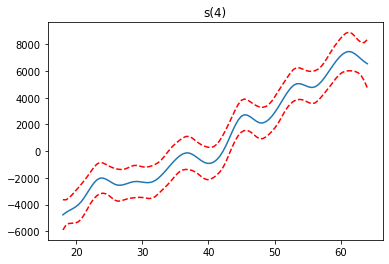

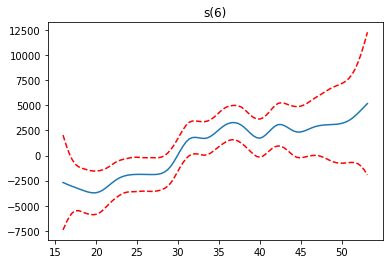

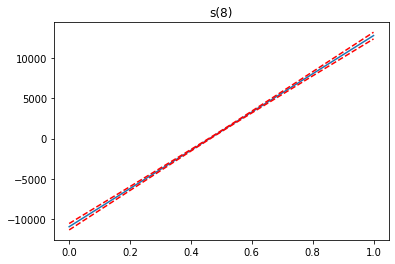

In [ ]:
for i, term in enumerate(model3.terms):
    if term.isintercept:
        continue

    XX = model3.generate_X_grid(term=i)
    pdep, confi = model3.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

Quelles informations tirez-vous du GAM ?

In [ ]:
#Votre réponse ici entre """ """

# Conclusion
Indiquez ce que les différents modèles vous ont apporté comme connaissances sur les données et le fonctionnement de ces modèles.

In [ ]:
#Votre réponse ici entre """ """